In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

In [3]:
train=pd.read_csv('train.csv')
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
train.head(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
print('train shape is ',train.shape)

print('train info',train.info)

train shape is  (159571, 8)
train info <bound method DataFrame.info of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think yo

In [6]:
print('train data Set descriptin',train.describe())


train data Set descriptin            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000 

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
Axes(0.125,0.11;0.62x0.77)


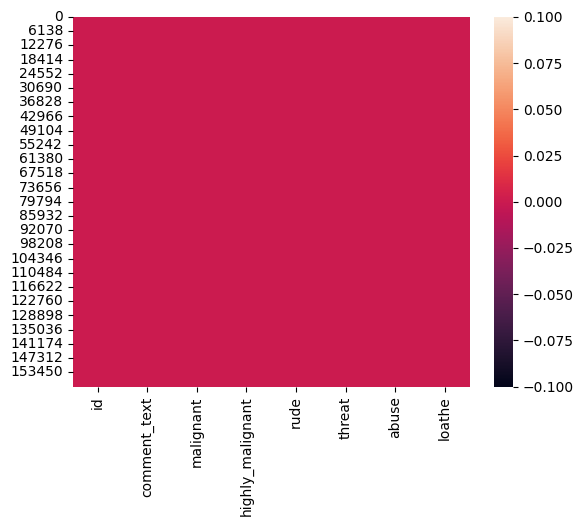

In [7]:
# checking null values
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\1847319902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.corr())
C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\1847319902.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(sns.heatmap(train.corr()))


                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
Axes(0.125,0.11;0.62x0.77)


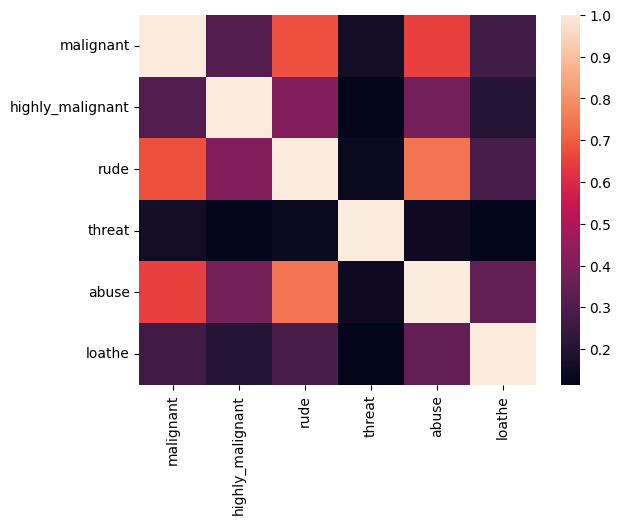

In [8]:
## checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr()))

In [9]:
# checking the skewness for the features:
train.skew()

C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\3462410898.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

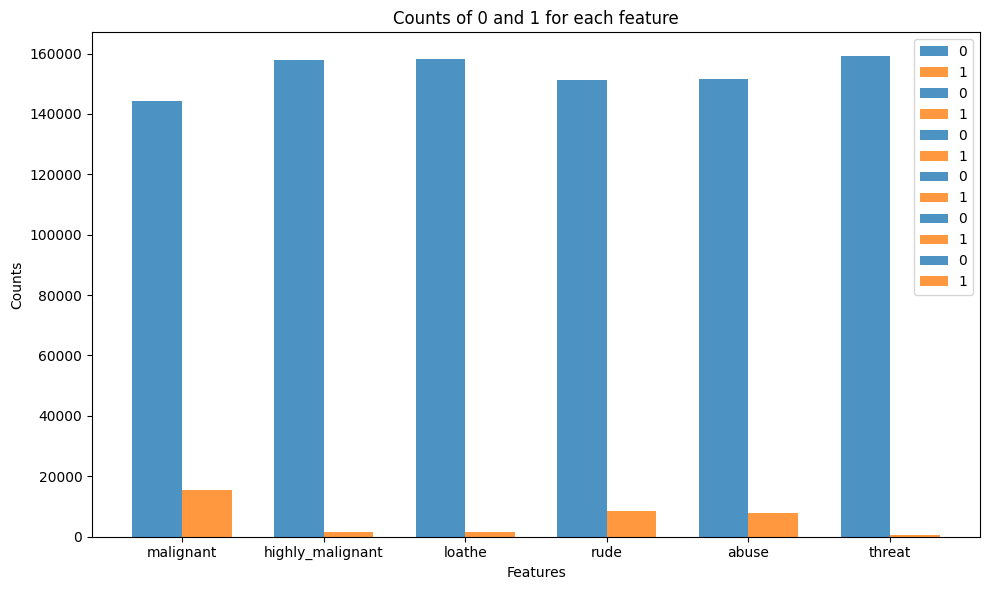

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Getting the feature names and the count of each label value for each feature
feature_names = ['malignant','highly_malignant','loathe','rude','abuse','threat']
label_counts = []
for feature_name in feature_names:
    label_counts.append(train[feature_name].value_counts())

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8
index = range(len(feature_names))
colors = ['#1f77b4', '#ff7f0e']
for i, label_count in enumerate(label_counts):
    ax.bar(index[i]-bar_width/2, label_count[0], bar_width, alpha=opacity, color=colors[0], label='0')
    ax.bar(index[i]+bar_width/2, label_count[1], bar_width, alpha=opacity, color=colors[1], label='1')
ax.set_xlabel('Features')
ax.set_ylabel('Counts')
ax.set_title('Counts of 0 and 1 for each feature')
ax.set_xticks(index)
ax.set_xticklabels(feature_names)
ax.legend()
plt.tight_layout()
plt.show()


In [11]:
for i in train.columns[2:]:
    print('Value Counts of',i)
    print(train[i].value_counts())
    print('='*100)

Value Counts of malignant
0    144277
1     15294
Name: malignant, dtype: int64
Value Counts of highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
Value Counts of rude
0    151122
1      8449
Name: rude, dtype: int64
Value Counts of threat
0    159093
1       478
Name: threat, dtype: int64
Value Counts of abuse
0    151694
1      7877
Name: abuse, dtype: int64
Value Counts of loathe
0    158166
1      1405
Name: loathe, dtype: int64


In [12]:
# # Plotting countplot for all the features
# categories=df.columns[2:]
# plt.figure(figsize=(15,20),facecolor='white')
# plotnumber=1
# for col in categories:
#     if plotnumber<=6:
#         ax=plt.subplot(3,2,plotnumber)
#         sns.countplot(df[col])
#         plt.xlabel(col,fontsize=20)
#         plt.xticks(fontsize=16,fontweight ='bold')
#         plt.yticks(fontsize=16,fontweight ='bold')
#     plotnumber += 1
# plt.show()

In [13]:
# #Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
# data_count = df.iloc[:,2:].sum()

In [14]:
# # Plot a chart with the following size
# plt.figure(figsize=(14,9))

# # Plot a bar chart using the index (category values) and the count of each category.
# ax = sns.barplot(data_count.index, data_count.values)

# plt.title("No. of Comments per Class", fontsize=20, fontweight='bold')
# plt.ylabel('No. of Occurrences', fontsize=18,fontweight='bold')
# plt.xlabel('Comment Categories', fontsize=18,fontweight='bold')
# plt.xticks(fontsize=16,fontweight ='bold')
# plt.yticks(fontsize=16,fontweight ='bold')
# rects = ax.patches
# labels = data_count.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
# plt.show()

C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\2080975542.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comment_len, bins=20, color = 'blue')


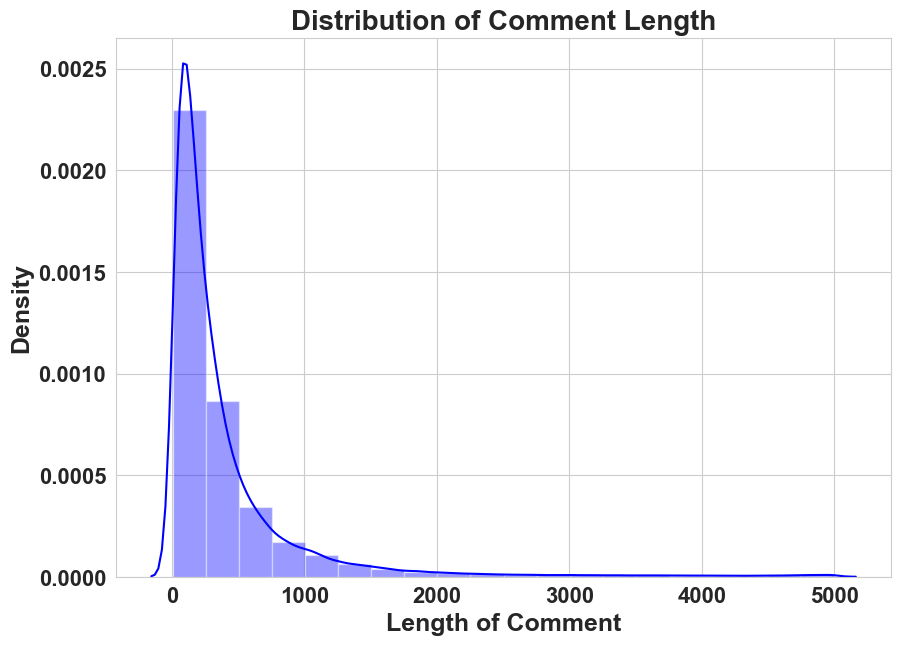

In [15]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

In [16]:
# col=['malignant','highly_malignant','loathe','rude','abuse','threat']
# for i in col:
#     print(i)
#     print("\n")
#     print(train[i][0])
#     sns.countplot(train[i])
#     plt.show()

In [17]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [18]:
train['length'] = train['comment_text'].str.len()
train.head(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


In [19]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\2392113331.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\2392113331.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\2392113331.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\2392113331.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text

In [20]:
train['clean_length'] = train.comment_text.str.len()
train.head(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47
5,00025465d4725e87,"congratulation well, use tool well. · talk",0,0,0,0,0,0,65,42
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27
7,00031b1e95af7921,vandalism matt shirvington article reverted. p...,0,0,0,0,0,0,115,66
8,00037261f536c51d,"sorry word 'nonsense' offensive you. anyway, i...",0,0,0,0,0,0,472,313
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36


In [21]:
# Total length removal
print ('Original Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Original Length 62893130
Clean Length 43575187


In [22]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

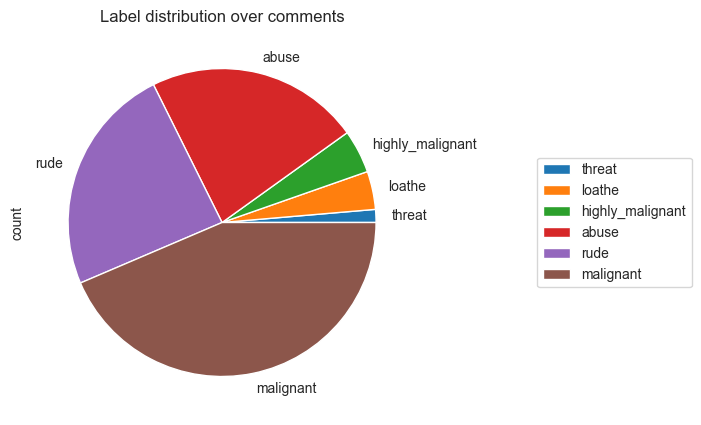

In [23]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [24]:
# ADDITIONAL FEATURE OF DESIGN MODEL CAN BE USTILIZED WITH FORMUALTIONS MENTIONED FOR THE DATA CHOSEN FOR CLASSIFCATION MODEL
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [25]:
train.head(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,0
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111,0
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149,0
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397,0
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47,0
5,00025465d4725e87,"congratulation well, use tool well. · talk",0,0,0,0,0,0,65,42,0
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27,1
7,00031b1e95af7921,vandalism matt shirvington article reverted. p...,0,0,0,0,0,0,115,66,0
8,00037261f536c51d,"sorry word 'nonsense' offensive you. anyway, i...",0,0,0,0,0,0,472,313,0
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36,0


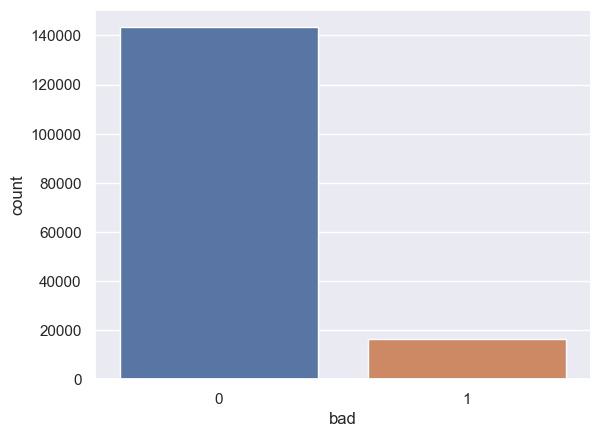

In [26]:
sns.set()
sns.countplot(x="bad" , data = train)#bad and good comments
plt.show()

In [27]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [28]:
train.shape

(159571, 11)

In [29]:
train.head(15)


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,0
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111,0
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149,0
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397,0
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47,0
5,00025465d4725e87,"congratulation well, use tool well. · talk",0,0,0,0,0,0,65,42,0
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27,1
7,00031b1e95af7921,vandalism matt shirvington article reverted. p...,0,0,0,0,0,0,115,66,0
8,00037261f536c51d,"sorry word 'nonsense' offensive you. anyway, i...",0,0,0,0,0,0,472,313,0
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36,0


In [30]:
y=train['bad']
x_train_normal,x_test_normal,y_train_normal,y_test_normal=train_test_split(x,y,random_state=56,test_size=.30)

In [31]:
y_train_normal.shape,y_test_normal.shape

((111699,), (47872,))

In [32]:
# Scale the data
scaler = StandardScaler(with_mean=False)
x_train_normal = scaler.fit_transform(x_train_normal)
x_test_normal = scaler.transform(x_test_normal)


In [33]:
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

In [34]:
# Reduce the number of features using TruncatedSVD
svd = TruncatedSVD(n_components=10)
x_train_normal = svd.fit_transform(x_train_normal)
x_test_normal = svd.transform(x_test_normal)

In [35]:
from wordcloud import WordCloud

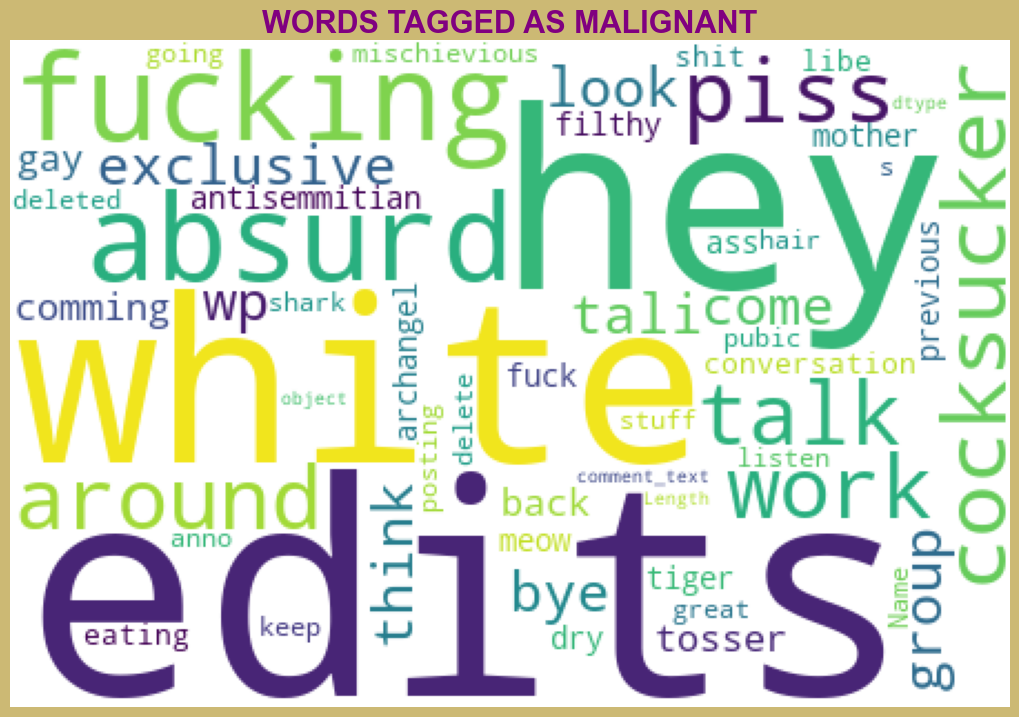

In [36]:
# Plotting for malignant
df_malignant=train[(train['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

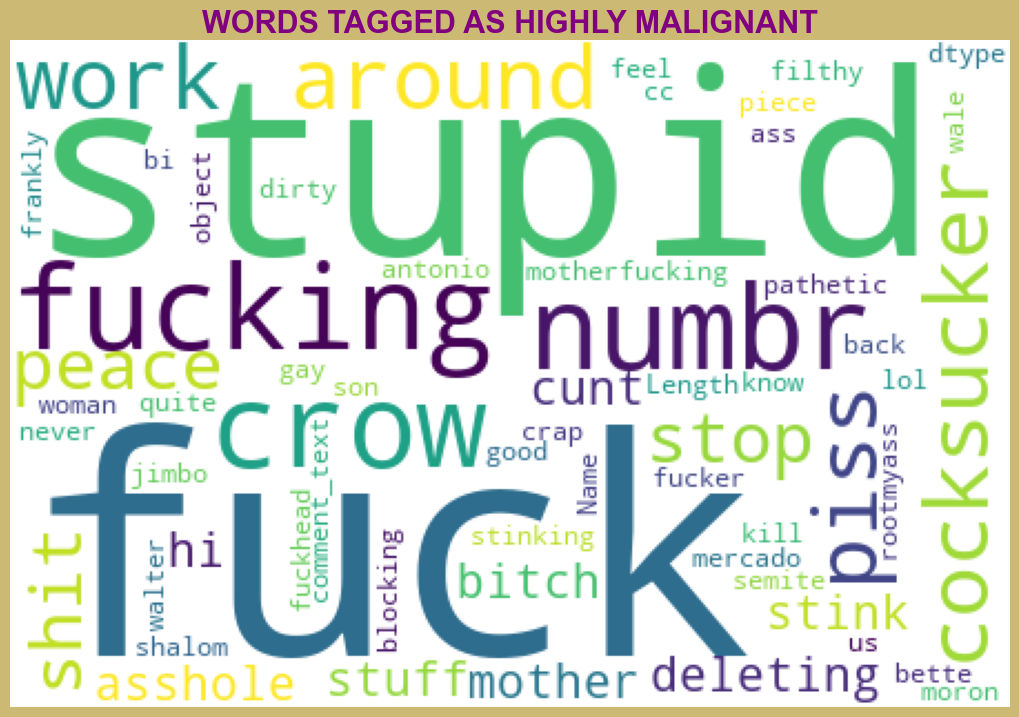

In [37]:
# Plotting for highly_malignant
df_highlymalignant=train[(train['highly_malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

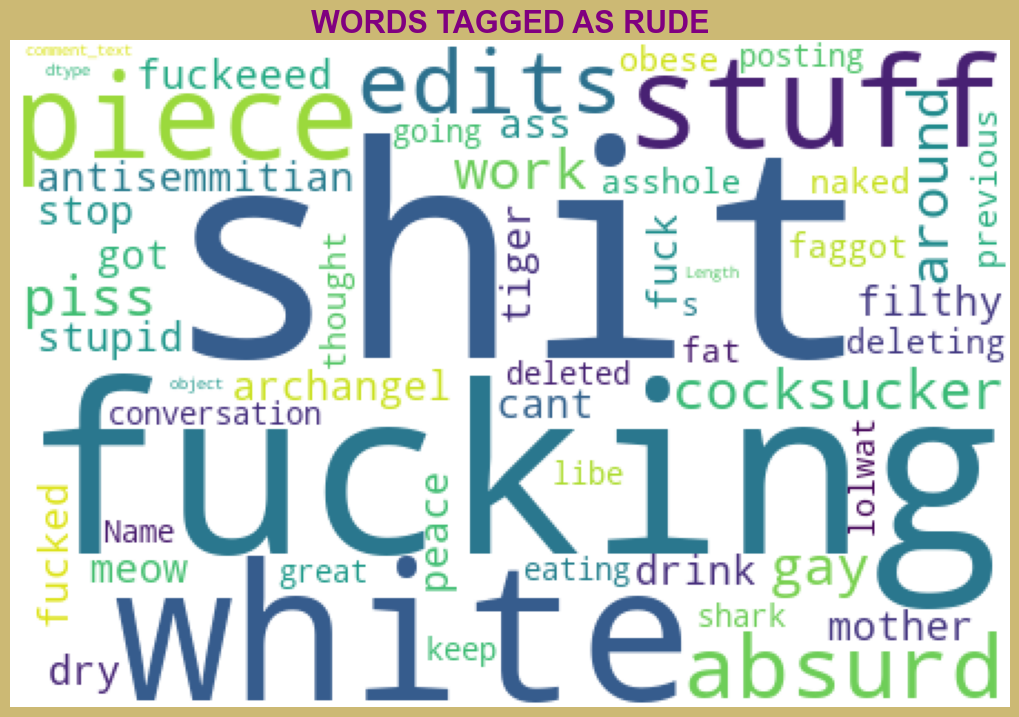

In [38]:
# Plotting for rude
df_rude=train[(train['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

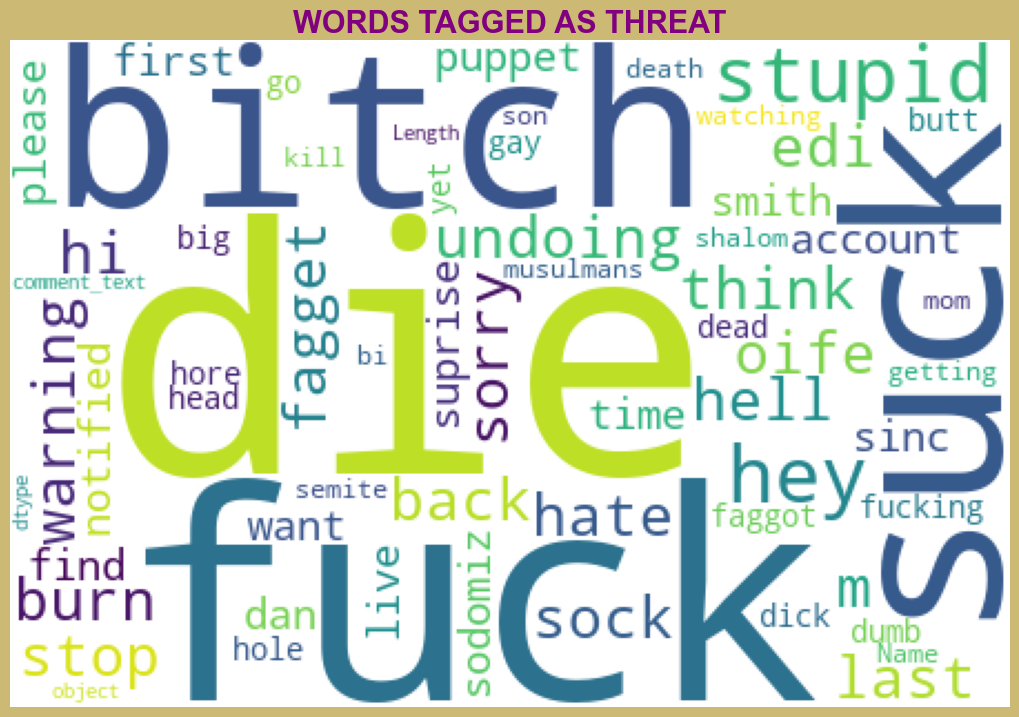

In [39]:
# Plotting for threat
df_threat=train[(train['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

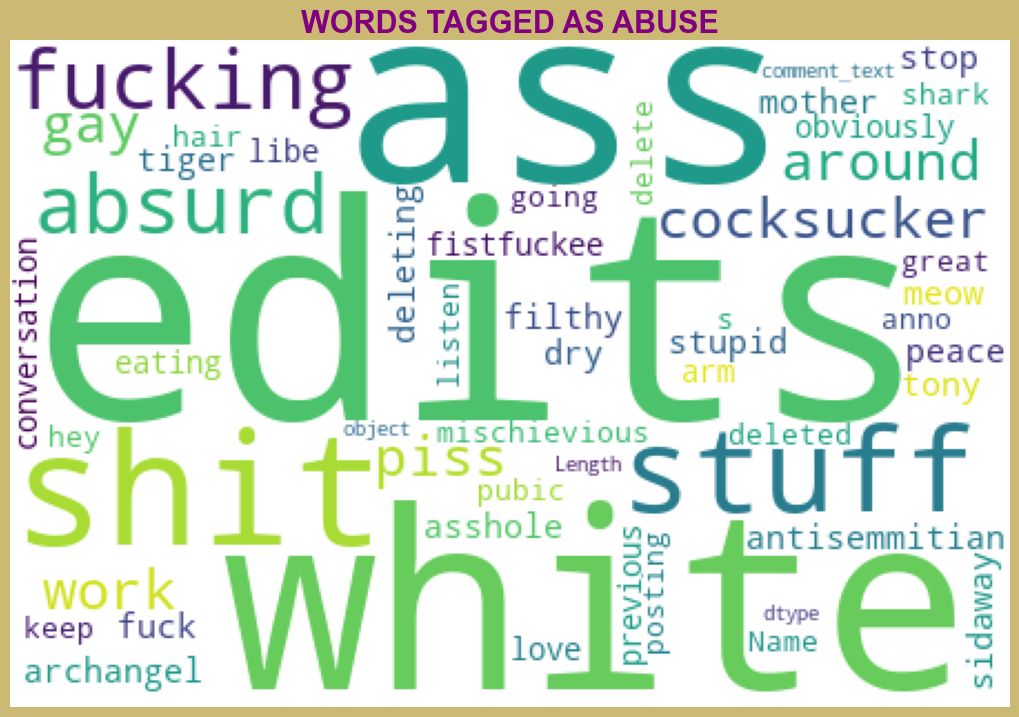

In [40]:
# Plotting for abuse
df_abuse=train[(train['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

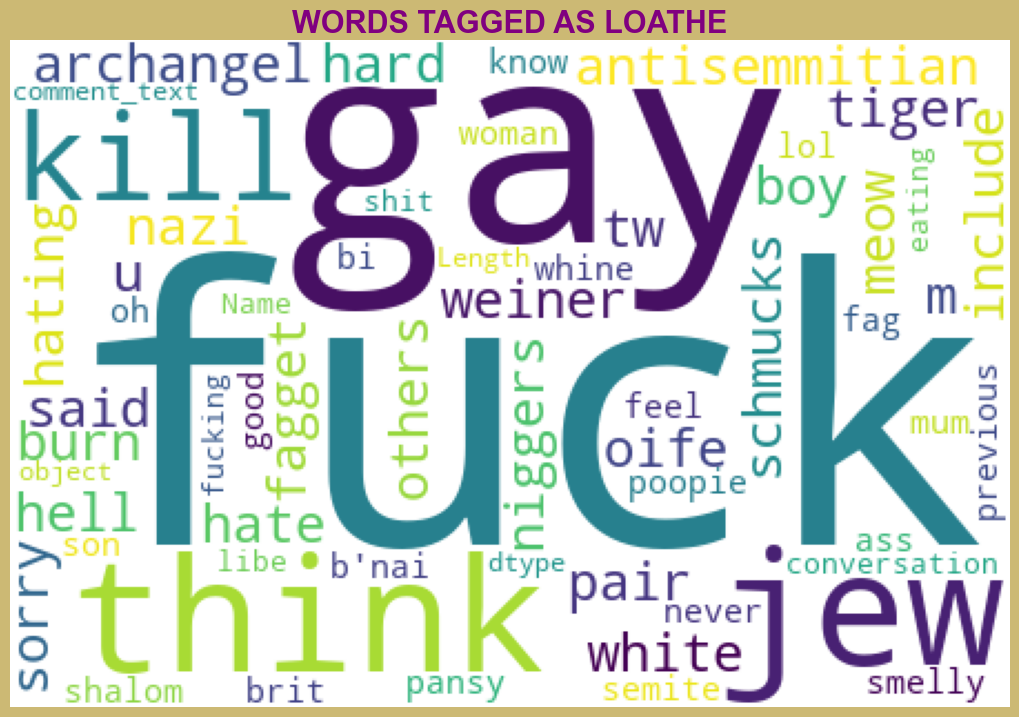

In [41]:
# Plotting for loathe
df_loathe=train[(train['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

In [42]:
# LogisticRegression

start = time.time()
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train_normal, y_train_normal)
y_pred_train = LG.predict(x_train_normal)

print('Training accuracy is {}'.format(accuracy_score(y_train_normal, y_pred_train)))
y_pred_test1 = LG.predict(x_test_normal)
print('Test accuracy is {}'.format(accuracy_score(y_test_normal,y_pred_test1)))
end = time.time()
print(f"Time taken: {end-start:.2f}s")
print("\n")
# print(confusion_matrix(y_test_normal,y_pred_test1))
print(classification_report(y_test_normal,y_pred_test1))

Training accuracy is 0.9053169679227209
Test accuracy is 0.9029913101604278
Time taken: 0.29s


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     42950
           1       0.84      0.07      0.13      4922

    accuracy                           0.90     47872
   macro avg       0.87      0.53      0.54     47872
weighted avg       0.90      0.90      0.86     47872



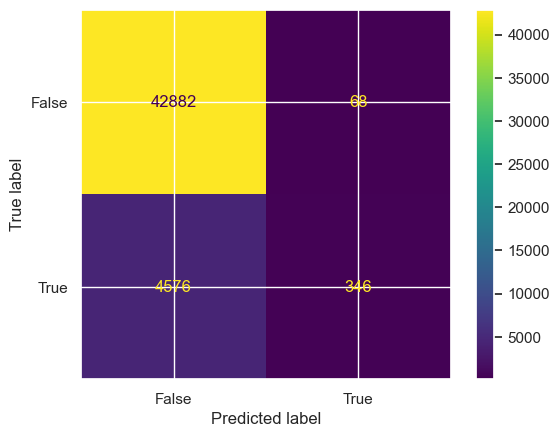

In [43]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_normal,y_pred_test1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [44]:
# import time
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from sklearn.metrics import accuracy_score, classification_report

# start = time.time()

# # define the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(x_train_normal.shape[1], 1)))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # fit the LSTM model on the training data
# model.fit(x_train_normal.reshape((x_train_normal.shape[0], x_train_normal.shape[1], 1)), y_train_normal, epochs=50, batch_size=32)

# # make predictions on the training data and calculate the accuracy
# y_pred_train = (model.predict(x_train_normal.reshape((x_train_normal.shape[0], x_train_normal.shape[1], 1))) > 0.5).astype('int32')
# train_acc = accuracy_score(y_train_normal, y_pred_train)
# print('Training accuracy is {}'.format(train_acc))

# # make predictions on the test data and calculate the accuracy
# y_pred_test = (model.predict(x_test_normal.reshape((x_test_normal.shape[0], x_test_normal.shape[1], 1))) > 0.5).astype('int32')
# test_acc = accuracy_score(y_test_normal, y_pred_test)
# print('Test accuracy is {}'.format(test_acc))

# # print the classification report for the test data
# print(classification_report(y_test_normal, y_pred_test))

# end = time.time()
# print(f"Time taken: {end-start:.2f}s")


In [45]:
from joblib import parallel_backend
from sklearn.linear_model import LogisticRegression
# Train and evaluate a logistic regression classifier
start = time.time()
lr = LogisticRegression(random_state=42)
param_grid = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr, param_grid, cv=5)
# with parallel_backend('threading'):
lr_grid.fit(x_train_normal, y_train_normal)
lr_pred_train = lr_grid.predict(x_train_normal)
lr_pred_test = lr_grid.predict(x_test_normal)
lr_score_train = lr_grid.score(x_train_normal, y_train_normal)
lr_score_test = lr_grid.score(x_test_normal, y_test_normal)
end = time.time()
print(f"Logistic Regression Training Score: {lr_score_train:}")
print(f"Logistic Regression Testing Score: {lr_score_test:}")
print(f"Time taken: {end-start:.2f}s")


Logistic Regression Training Score: 0.9053438258175991
Logistic Regression Testing Score: 0.9029913101604278
Time taken: 4.08s


In [46]:
lr_grid

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10]})

In [47]:
import re
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
temp = []

In [48]:
def text_test_preprocessing(x):
    review = re.sub('[^a-zA-z]',' ',x)
    review = review.lower()
    review = review.split()
    review = [stemmer.lemmatize(word) for word in review if word not in  stop_words]
    review = ' '.join(review)
    return review

In [49]:
# sample1 =[]
# sample = "I am good"
# sample1.append(text_test_preprocessing(sample))
# LG.predict(tf_vec.transform(sample1))

In [50]:
start = time.time()
# DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train_normal, y_train_normal)
y_pred_train = DT.predict(x_train_normal)
end = time.time()
print('Training accuracy is {}'.format(accuracy_score(y_train_normal, y_pred_train)))
y_pred_test2 = DT.predict(x_test_normal)
print('Test accuracy is {}'.format(accuracy_score(y_test_normal,y_pred_test2)))
print("\n")
# print(confusion_matrix(y_test_normal,y_pred_test2))
print(classification_report(y_test_normal,y_pred_test2))
print(f"Time taken: {end-start:.2f}s")


Training accuracy is 0.9988898736783678
Test accuracy is 0.8787809157754011


              precision    recall  f1-score   support

           0       0.93      0.93      0.93     42950
           1       0.41      0.42      0.42      4922

    accuracy                           0.88     47872
   macro avg       0.67      0.68      0.67     47872
weighted avg       0.88      0.88      0.88     47872

Time taken: 2.63s


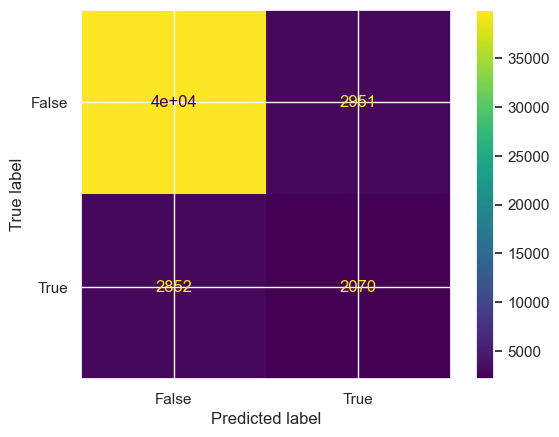

In [51]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_normal,y_pred_test2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [52]:
# Train and evaluate the decision tree classifier
start = time.time()
dtc = DecisionTreeClassifier(random_state=42)
dtc_params = {'max_depth': [3, 5, 7, 9, 11]}
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5)
dtc_gs.fit(x_train_normal, y_train_normal)
dtc_score_train = dtc_gs.score(x_train_normal, y_train_normal)
dtc_score_test = dtc_gs.score(x_test_normal, y_test_normal)
end = time.time()
print(f"Decision Tree Classifier Training Score: {dtc_score_train:}")
print(f"Decision Tree Classifier Testing Score: {dtc_score_test:}")
print(f"Time taken: {end-start:.2f}s")

Decision Tree Classifier Training Score: 0.9233028048594885
Decision Tree Classifier Testing Score: 0.9135820521390374
Time taken: 25.59s


In [53]:
#RandomForestClassifier
start = time.time()
RF = RandomForestClassifier()

RF.fit(x_train_normal, y_train_normal)
y_pred_train = RF.predict(x_train_normal)
end = time.time()
print('Training accuracy is {}'.format(accuracy_score(y_train_normal, y_pred_train)))
y_pred_test3 = RF.predict(x_test_normal)
print('Test accuracy is {}'.format(accuracy_score(y_test_normal,y_pred_test3)))
# print(confusion_matrix(y_test_normal,y_pred_test3))
print("\n")
print(classification_report(y_test_normal,y_pred_test3))
print(f"Time taken: {end-start:.2f}s")

Training accuracy is 0.9988451105202374
Test accuracy is 0.9223972259358288


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     42950
           1       0.77      0.35      0.48      4922

    accuracy                           0.92     47872
   macro avg       0.85      0.67      0.72     47872
weighted avg       0.91      0.92      0.91     47872

Time taken: 65.17s


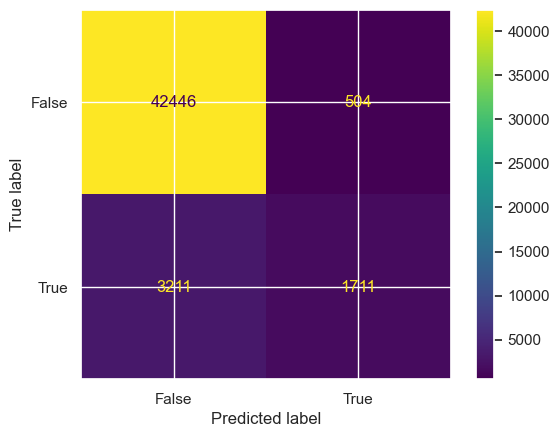

In [54]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_normal,y_pred_test3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Uncomment IT later

In [55]:
start = time.time()
rfc = RandomForestClassifier(random_state=42)
rfc_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7, 9, 11]}
rfc_gs = GridSearchCV(rfc, rfc_params, cv=5)
rfc_gs.fit(x_train_normal, y_train_normal)
rfc_score_train = rfc_gs.score(x_train_normal, y_train_normal)
rfc_score_test = rfc_gs.score(x_test_normal, y_test_normal)
end = time.time()
print(f"Random Forest Classifier Training Score: {rfc_score_train:}")
print(f"Random Forest Classifier Testing Score: {rfc_score_test:}")
print(f"Time taken: {end-start:.2f}s")

Random Forest Classifier Training Score: 0.9298203206832648
Random Forest Classifier Testing Score: 0.9196816510695187
Time taken: 1541.24s


In [56]:
#AdaBoostClassifier
start = time.time()
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train_normal, y_train_normal)
y_pred_train = ada.predict(x_train_normal)
print('Training accuracy is {}'.format(accuracy_score(y_train_normal, y_pred_train)))
y_pred_test5 = ada.predict(x_test_normal)
print('Test accuracy is {}'.format(accuracy_score(y_test_normal,y_pred_test5)))
# print(confusion_matrix(y_test_normal,y_pred_test5))
print("\n")
print(classification_report(y_test_normal,y_pred_test5))
end = time.time()
print(f"Time taken: {end-start:.2f}s")

Training accuracy is 0.9160243153474964
Test accuracy is 0.9142505013368984


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     42950
           1       0.74      0.26      0.38      4922

    accuracy                           0.91     47872
   macro avg       0.83      0.62      0.67     47872
weighted avg       0.90      0.91      0.90     47872

Time taken: 24.99s


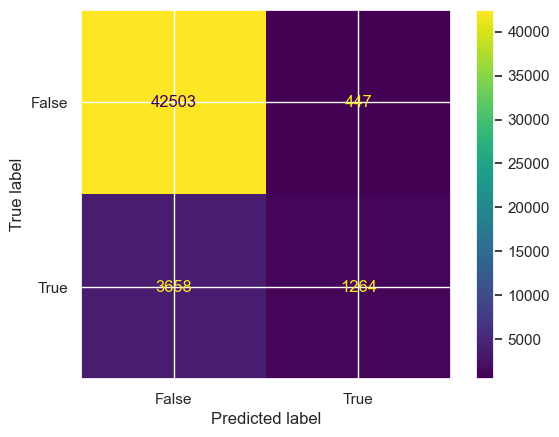

In [57]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_normal,y_pred_test5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Train and evaluate an Adaboost classifier
# Adaboost Classifier
start = time.time()
ada = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}
ada_grid = GridSearchCV(ada, param_grid, cv=5)
with parallel_backend('threading'):
    ada_grid.fit(x_train_normal, y_train_normal)
ada_pred_train = ada_grid.predict(x_train_normal)    
ada_pred_test = ada_grid.predict(x_test_normal)
abc_accuracy_train = accuracy_score(y_train_normal, ada_pred_train)
abc_accuracy_test = accuracy_score(y_test_normal, ada_pred_test)
end = time.time()
print(f"AdaBoost Classifier Training Score: {abc_accuracy_train:}")
print(f"AdaBoost Classifier Testing Score: {abc_accuracy_test:}")
print(f"Time taken: {end-start:.2f}s")

AdaBoost Classifier Training Score: 0.9166957627194514
AdaBoost Classifier Testing Score: 0.9146682820855615
Time taken: 223.57s


In [59]:
#KNeighborsClassifier
start = time.time()
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_normal, y_train_normal)
y_pred_train = knn.predict(x_train_normal)
print('Training accuracy is {}'.format(accuracy_score(y_train_normal, y_pred_train)))
y_pred_test6 = knn.predict(x_test_normal)
print('Test accuracy is {}'.format(accuracy_score(y_test_normal,y_pred_test6)))
# print(confusion_matrix(y_test_normal,y_pred_test6))
print("\n")
print(classification_report(y_test_normal,y_pred_test6))
end = time.time()
print(f"Time taken: {end-start:.2f}s")

Training accuracy is 0.9296412680507435
Test accuracy is 0.9194727606951871


              precision    recall  f1-score   support

           0       0.93      0.98      0.96     42950
           1       0.71      0.36      0.48      4922

    accuracy                           0.92     47872
   macro avg       0.82      0.67      0.72     47872
weighted avg       0.91      0.92      0.91     47872

Time taken: 56.53s


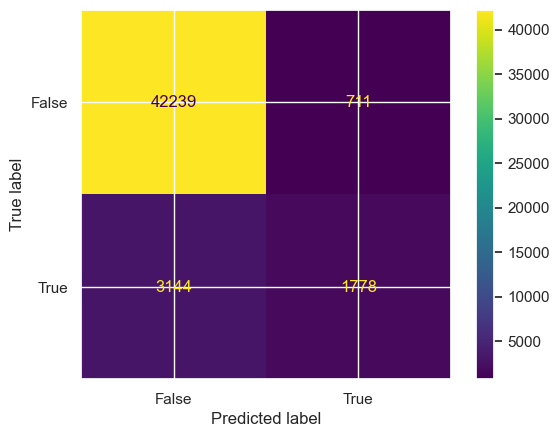

In [60]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_normal,y_pred_test6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [61]:
# Train and evaluate the KNN classifier
start = time.time()
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_gs = GridSearchCV(knn, knn_params, cv=5)
knn_gs.fit(x_train_normal, y_train_normal)
knn_score_train = knn_gs.score(x_train_normal, y_train_normal)
knn_score_test = knn_gs.score(x_test_normal, y_test_normal)
end = time.time()
print(f"KNN Classifier Training Score: {knn_score_train:}")
print(f"KNN Classifier Testing Score: {knn_score_test:}")
print(f"Time taken: {end-start:.2f}s")

KNN Classifier Training Score: 0.9289161048890321
KNN Classifier Testing Score: 0.920120320855615
Time taken: 215.56s


In [62]:
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

# # Train and evaluate the SVM classifier
# start = time.time()
# svm = SVC(kernel='linear', C=1, random_state=42)
# svm.fit(x_train_normal, y_train_normal)
# svm_pred_train = svm.predict(x_train_normal)
# svm_pred_test = svm.predict(x_test_normal)
# svm_score_train = svm.score(x_train_normal, y_train_normal)
# svm_score_test = svm.score(x_test_normal, y_test_normal)
# end = time.time()
# print(f"SVM Classifier Training Score: {svm_score_train:.2f}")
# print(f"SVM Classifier Testing Score: {svm_score_test:.2f}")
# print(f"Time taken: {end-start:.2f}s")

In [63]:
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # SVM Classifier
# start = time.time()
# svm = SVC(random_state=42)
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }
# svm_grid = GridSearchCV(svm, param_grid, cv=5)
# svm_grid.fit(x_train_normal, y_train_normal)
# svm_score_train = svm_grid.score(x_train_normal, y_train_normal)
# svm_score_test = svm_grid.score(x_test_normal, y_test_normal)
# end = time.time()
# print(f"SVM Classifier Training Score: {svm_score_train:.2f}")
# print(f"SVM Classifier Testing Score: {svm_score_test:.2f}")
# print(f"Time taken: {end-start:.2f}s")

In [64]:
# Train and evaluate the XGBoost classifier

from xgboost import XGBClassifier
start = time.time()
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train_normal, y_train_normal)
xgb_pred_train = xgb.predict(x_train_normal)
xgb_pred_test = xgb.predict(x_test_normal)
xgb_score_train = xgb.score(x_train_normal, y_train_normal)
xgb_score_test = xgb.score(x_test_normal, y_test_normal)
end = time.time()
print(f"XGBoost Classifier Training Score: {xgb_score_train:.2f}")
print(f"XGBoost Classifier Testing Score: {xgb_score_test:.2f}")
print(f"Time taken: {end-start:.2f}s")

XGBoost Classifier Training Score: 0.93
XGBoost Classifier Testing Score: 0.92
Time taken: 4.37s


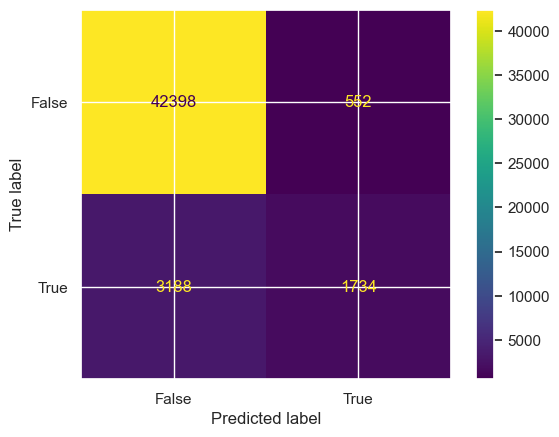

In [65]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_normal,xgb_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [66]:
# XGBoost Classifier
start = time.time()
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train_normal, y_train_normal)
y_pred_train = xgb.predict(x_train_normal)
print('Training accuracy is {}'.format(accuracy_score(y_train_normal, y_pred_train)))
y_pred_test = xgb.predict(x_test_normal)
print('Test accuracy is {}'.format(accuracy_score(y_test_normal, y_pred_test)))
print("\n")
print(classification_report(y_test_normal, y_pred_test))
end = time.time()
print(f"Time taken: {end-start:.2f}s")

Training accuracy is 0.9367944207199707
Test accuracy is 0.9231910093582888


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     42950
           1       0.75      0.38      0.50      4922

    accuracy                           0.92     47872
   macro avg       0.84      0.68      0.73     47872
weighted avg       0.91      0.92      0.91     47872

Time taken: 4.14s


In [67]:
import xgboost as xgb

# Train and evaluate an XGBoost classifier
start = time.time()
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=5)
xgb_grid.fit(x_train_normal, y_train_normal)
xgb_pred_train = xgb_grid.predict(x_train_normal)
xgb_pred_test = xgb_grid.predict(x_test_normal)
xgb_score_train = xgb_grid.score(x_train_normal, y_train_normal)
xgb_score_test = xgb_grid.score(x_test_normal, y_test_normal)
end = time.time()
print(f"XGBoost Training Score: {xgb_score_train:}")
print(f"XGBoost Testing Score: {xgb_score_test:}")
print(f"Time taken: {end-start:.2f}s")

XGBoost Training Score: 0.9315750364819739
XGBoost Testing Score: 0.9230238970588235
Time taken: 136.27s


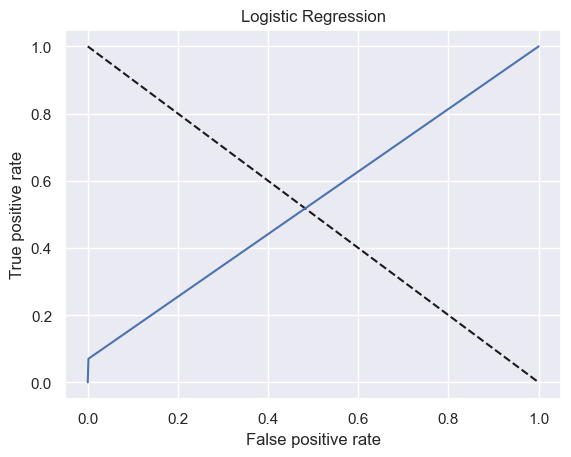

In [68]:
fpr,tpr,thresholds=roc_curve(y_test_normal,y_pred_test1)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

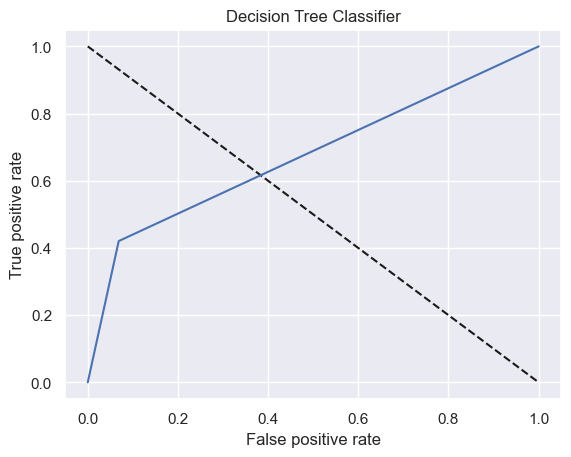

In [69]:
fpr,tpr,thresholds=roc_curve(y_test_normal,y_pred_test2)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

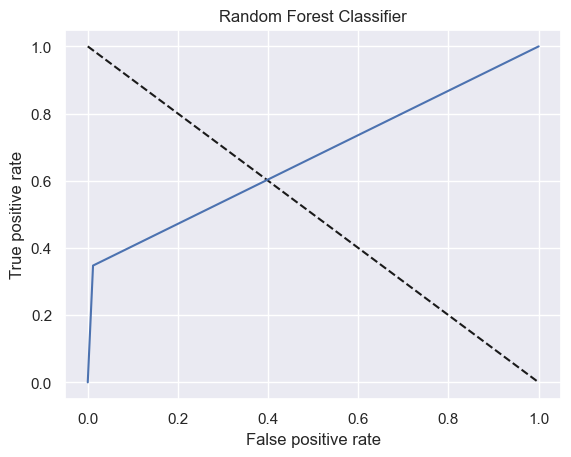

In [70]:
fpr,tpr,thresholds=roc_curve(y_test_normal,y_pred_test3)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

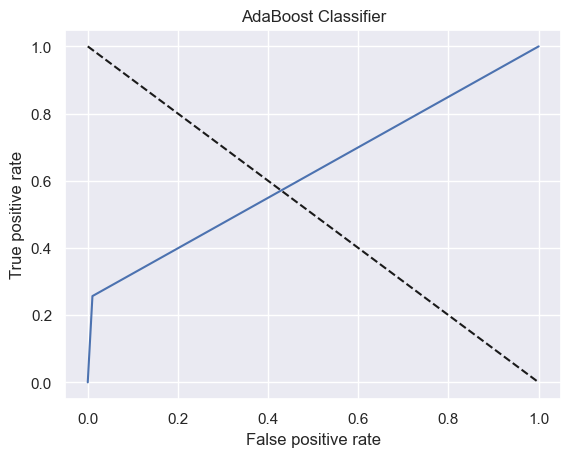

In [71]:
fpr,tpr,thresholds=roc_curve(y_test_normal,y_pred_test5)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'AdaBoost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost Classifier')
plt.show()

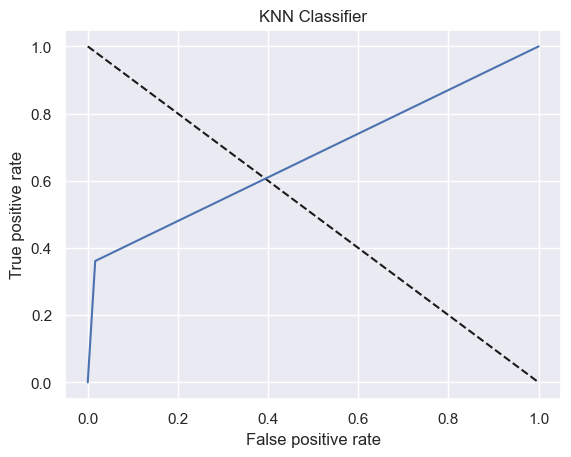

In [72]:
fpr,tpr,thresholds=roc_curve(y_test_normal,y_pred_test6)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNN Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN Classifier')
plt.show()

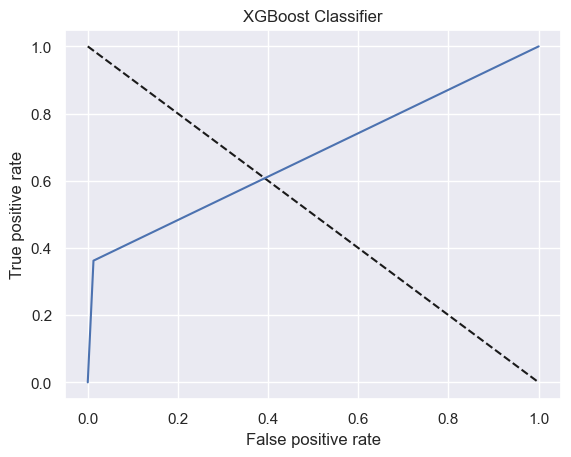

In [73]:
fpr,tpr,thresholds=roc_curve(y_test_normal,xgb_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'XGBoost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost Classifier')
plt.show()

Testing

In [74]:
test=pd.read_csv('test.csv')
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [75]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [76]:
# prediction=RF.predict(test_data)
# prediction

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [78]:
acc1=accuracy_score(y_test_normal,y_pred_test1)*100
acc2=accuracy_score(y_test_normal,y_pred_test2)*100
acc3=accuracy_score(y_test_normal, y_pred_test3)*100
acc4=accuracy_score(y_test_normal, xgb_pred_test)*100
acc5=accuracy_score(y_test_normal, y_pred_test5)*100
acc6=accuracy_score(y_test_normal, y_pred_test6)*100

acc1


90.29913101604278

In [79]:
col=['Logistic','DecisionTree', 'Random Forest','XGBoost', 'AdaBoost','KNNeighbours']
acc=[acc1,
   acc2,
   acc3,
   acc4,
   acc5,
   acc6]
lst = col

lst2 = acc

df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['classifier', 'accuracy'])
df


,classifier,accuracy
0,Logistic,90.299131
1,DecisionTree,87.878092
2,Random Forest,92.239723
3,XGBoost,92.302390
4,AdaBoost,91.425050
5,KNNeighbours,91.947276


C:\Users\charan varma\AppData\Local\Temp\ipykernel_22956\1620599633.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x="classifier",y="accuracy",data=df,ci="sd")


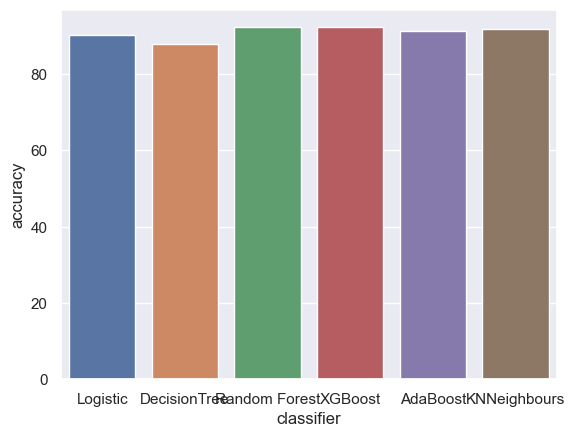

In [80]:
ax=sns.barplot(x="classifier",y="accuracy",data=df,ci="sd")

In [81]:
y_pred_test1

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
y_test_normal


107646    0
46055     1
121458    0
52011     1
52488     0
         ..
55937     0
38660     0
68031     0
113412    0
34609     0
Name: bad, Length: 47872, dtype: int32

In [83]:
import re
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
temp = []

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

def text_test_preprocessing(review):
    review = review.lower()
    review = review.split()
    review = [stemmer.lemmatize(word) for word in review if word not in  stop_words]
    review = ' '.join(review)
    return review

X_train_f = np.array(train['comment_text'])
y_train_f = np.array(train['bad'])
temp1 = []
temp2 = input()
temp1.append(temp2)
X_test_f = np.array(temp1)

# Preprocess the training data
X_train_preprocessed = [text_test_preprocessing(text) for text in X_train_f]

# Define the vectorizer and fit it on the training data
tf_vec = TfidfVectorizer()
tf_vec.fit(X_train_preprocessed)

# Preprocess the test data and transform it using the vectorizer
X_test_preprocessed = [text_test_preprocessing(text) for text in X_test_f]
X_test_vec = tf_vec.transform(X_test_preprocessed)

# Define the LogisticRegression model and fit it on the training data
LG = LogisticRegression()
LG.fit(tf_vec.transform(X_train_preprocessed), y_train_f)

# Use the fitted model to make predictions on the test data
LG.predict(X_test_vec)
# print("X value is ",LG.predict(X_test_vec))
print("The text you entered is : \"",temp2, "\"")
if(LG.predict(X_test_vec) == [0]):
    print("The text contains no toxicity.")
else:
    print("The text contains toxic words.")

The text you entered is : " fuck "
The text contains toxic words.


c:\Users\charan varma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
train['bad']

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: bad, Length: 159571, dtype: int32

In [86]:
df = pd.read_csv('train.csv')

In [87]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [88]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [89]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df['comment_text'], df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']], test_size=0.3, random_state=42)

# Create a pipeline for transforming the text data and training a logistic regression model
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultiOutputClassifier(LogisticRegression(random_state=42, max_iter=500)))
])

# Fit the pipeline on the training data
text_clf.fit(X_train_f, y_train_f)

# Predict the labels of the test data
y_pred_f = text_clf.predict(X_test_f)

# Evaluate the performance of the model
print("Logistic Regression")
print('Accuracy:', accuracy_score(y_test_f, y_pred_f))
print('Performance report:')
print(classification_report(y_test_f, y_pred_f))


Logistic Regression
Accuracy: 0.9177598596256684
Performance report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      4582
           1       0.60      0.25      0.35       486
           2       0.92      0.60      0.73      2556
           3       0.67      0.13      0.22       136
           4       0.82      0.49      0.61      2389
           5       0.72      0.15      0.25       432

   micro avg       0.88      0.53      0.66     10581
   macro avg       0.77      0.37      0.48     10581
weighted avg       0.87      0.53      0.65     10581
 samples avg       0.05      0.04      0.05     10581



c:\Users\charan varma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\charan varma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.naive_bayes import MultinomialNB

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df['comment_text'], df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']], test_size=0.3, random_state=42)

# Create a pipeline for transforming the text data and training a logistic regression model
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultiOutputClassifier(MultinomialNB()))
])

# Fit the pipeline on the training data
text_clf.fit(X_train_f, y_train_f)

# Predict the labels of the test data
y_pred_f = text_clf.predict(X_test_f)

# Evaluate the performance of the model
print("MultinomialNB")
print('Accuracy:', accuracy_score(y_test_f, y_pred_f))
print('Performance report:')
print(classification_report(y_test_f, y_pred_f))


MultinomialNB
Accuracy: 0.8995028409090909
Performance report:
              precision    recall  f1-score   support

           0       0.99      0.17      0.30      4582
           1       0.00      0.00      0.00       486
           2       0.98      0.11      0.20      2556
           3       1.00      0.01      0.01       136
           4       0.96      0.04      0.08      2389
           5       0.00      0.00      0.00       432

   micro avg       0.98      0.11      0.20     10581
   macro avg       0.66      0.06      0.10     10581
weighted avg       0.90      0.11      0.19     10581
 samples avg       0.02      0.01      0.01     10581



c:\Users\charan varma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\charan varma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
import pandas as pd
from sklearn.metrics import classification_report

# Load the test dataset
test_df = pd.read_csv('test.csv')

# Extract the comment_text column from the test dataset
X_test_f = test_df['comment_text']

# Take user input for a comment_text
user_input = input('Enter a comment: ')

# Make a prediction on the user input using the trained model
user_pred = text_clf.predict([user_input])

# Print the predicted label for each class
print("Input Text: "+user_input)

print(f"Malignant: {user_pred[:, 0]}")
print(f"Highly Malignant: {user_pred[:, 1]}")
print(f"Rude: {user_pred[:, 2]}")
print(f"Threat: {user_pred[:, 3]}")
print(f"Abuse: {user_pred[:, 4]}")
print(f"Loathe: {user_pred[:, 5]}")


Input Text: fucking
Malignant: [1]
Highly Malignant: [0]
Rude: [1]
Threat: [0]
Abuse: [0]
Loathe: [0]
